***Генетический алгоритм, лабораторная***


**Введение**
---

**Коммивояжёр** (фр. commis voyageur) — бродячий торговец. **Задача коммивояжёра** — одна из самых известных задач комбинаторной оптимизации. Важная задача транспортной логистики, отрасли, занимающейся планированием транспортных перевозок. Коммивояжёру, чтобы распродать нужные и не очень нужные в хозяйстве товары, следует объехать **n** городов и в конце концов вернуться в исходный город. Требуется определить наиболее выгодный маршрут объезда. В качестве меры выгодности маршрута (точнее говоря, невыгодности) может служить суммарное время в пути, суммарная стоимость дороги, или, как в данной работе длина маршрута.

Задача коммивояжёра может быть решена перебором всех вариантов объезда и выбором оптимального. Проблема заключается в том, что количество возможных маршрутов очень быстро возрастает с ростом **n** (оно равно **n!** — количеству способов упорядочения пунктов). К примеру, для 100 пунктов количество вариантов будет представляться 158-значным числом! Мощная ЭВМ, способная перебирать миллион вариантов в секунду, будет биться с задачей на протяжении примерно $3⋅10^{144}$ лет.

Доказано, что не существует алгоритма решения, имеющего степенную сложность (то есть требующего порядка $n^a$ операций для некоторого **a**) — любой алгоритм будет хуже.

В таком случае следует отказаться от попыток отыскать точное решение задачи коммивояжёра и сосредоточиться на поиске приближённого — пускай не оптимального, но хотя бы близкого к нему. В виду большой практической важности задачи полезными будут и приближённые решения.

**Генетический алгоритм** – это разновидность эволюционного алгоритма, который используется для решения задач оптимизации и моделирования путём случайного подбора и комбинирования параметров. Идея генетических алгоритмов основана на эволюционной теории Чарльза Дарвина. Этот алгоритм симулирует процесс естественного отбора, когда более сильные особи из популяции переживают более слабых и производят следующее поколение особей. Данный алгоритм использует эволюционные принципы наследственности, изменчивости и естественного отбора.

**Постановка задачи.** Данная лабораторная работа посвящена рассмотрению решения геометрической задачи коммивояжера на основе генетического алгоритма. На вход данному алгоритму подается некоторое количество городов и их координаты **X**, **Y** на плоскости. Алгоритм должен построить кратчайший маршрут, проходящий через все города с возвращением в исходную точку.

Расстояние между городами считается по евклидовой метрике.

Дополнительные материалы
---

1. [В. Г. Cпицын, Ю. Р. Цой ПРИМЕНЕНИЕ ГЕНЕТИЧЕСКОГО АЛГОРИТМА
ДЛЯ РЕШЕНИЯ ЗАДАЧ ОПТИМИЗАЦИИ](https://portal.tpu.ru/SHARED/e/EXCEIBOT/academic/ISTab/Lab2.pdf)
2. Видео лекция по генетическому алгоритму:  [Генетический алгоритм (Кирсанов М.Н)](https://www.youtube.com/watch?v=ttsZV01aYYU).
3. Учебник: [Люк С. Основы метаэвристик. Перевод.](http://qai.narod.ru/GA/metaheuristics.html)

**Постановка задачи**
---

Зададим первоначальные условия задачи:

1) Выберем количество городов.

2) Расположим города случайным образом на плоскости.

In [ ]:
import numpy as np

np.random.seed(10)

number_cities = 15 # количество городов
list_cities = np.random.random([number_cities, 2]) # список координат городов
list_cities

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071],
       [0.16911084, 0.08833981],
       [0.68535982, 0.95339335],
       [0.00394827, 0.51219226],
       [0.81262096, 0.61252607],
       [0.72175532, 0.29187607],
       [0.91777412, 0.71457578],
       [0.54254437, 0.14217005],
       [0.37334076, 0.67413362],
       [0.44183317, 0.43401399],
       [0.61776698, 0.51313824],
       [0.65039718, 0.60103895]])

Выведем изображение с местоположением городов.

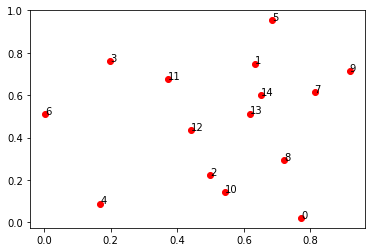

In [ ]:
import matplotlib.pyplot as plt

# нарисуем города
plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')

# пронумеруем города
for i in range(number_cities):
  plt.annotate(i, (list_cities[i][0], list_cities[i][1]))
plt.show()

**Маршрут**
---

**Маршрут** в данной реализации является массивом. Данный массив содержит number_cities элементов, каждый элемент массива это номер города. Маршрут проходит через города в соответствии с расположением городов в массиве и возвращается в стартовый город (первый город в массиве).

Где number_cities - это количество городов.

Ниже приведен пример построения кратчайшего маршрута проходящего через 10 точек:

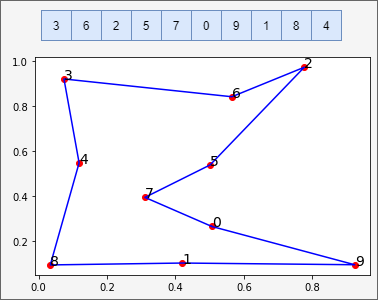

**Функция отрисовки маршрута**

Ниже представлена функция, позволяющая вывести маршрут в виде изображения. На данном изображении можно увидеть местоположение городов, номера городов и маршрут.

На вход данной функции подается список городов и маршрут.

In [ ]:
# нарисовать маршрут
def route_image(list_cities, route):
  # пронумеруем города
  for i in range(number_cities):
    plt.annotate(i, (list_cities[i][0], list_cities[i][1]), fontsize=14)
  
  # нарисуем города
  plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')

  # нарисуем маршрут
  x = [list_cities[route[-1]][0]]
  y = [list_cities[route[-1]][1]]
  for i in range(len(route)):
    x.append(list_cities[route[i]][0])
    y.append(list_cities[route[i]][1])
  plt.plot(x, y, c='blue')

  # выведем изображение
  plt.show()

Сгенерируем и выведем случайный маршрут.

Маршрут: [ 7 14  8 11 12 10  8  9  2  0  6  7  8 11  1]


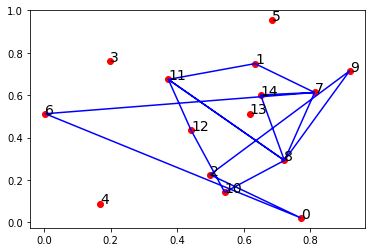

In [ ]:
route = np.random.randint(number_cities, size=number_cities) # сгенерированный маршрут
print("Маршрут:", route)
route_image(list_cities, route)

Из рисунка можно увидеть, что при генерации маршрута случайным образом может возникнуть ситуация, когда часть городов останутся пропущенными или посещенными несколько раз.

**Оценка качества маршрута**
---

**Функция оценки качества**

Данная функция позволяет оценить качество построенного маршрута. В данной постановке задачи расстояние между городами и длина маршрута считаются по евклидовой метрике. Также будем давать штраф за не посещение города, т.к. по условию задачи необходимо посетить все города, а маршрут может не содержать некоторых городов.

Формула евклидова расстояния:
$$d(p, q)=\sqrt{\sum_{i=1}^n {(p_i - q_i)}^2},$$

где ***p*** и ***q*** - города, n - количество признаков (координат) для каждого города.

На вход данной функции подается список городов (list_cities) и маршрут (route).

**Задание**: Вычислите длину маршрута по евклидовой метрике. Не забудьте, что маршрут замкнут, и нужно вернуться в первоначальный город

In [ ]:
import math

def route_length(list_cities, route):
    length = 0  # длина маршрута
    length_penalty = 0    # штраф за не посещение города
  
    for i in range(len(list_cities)):
        if i not in route:
            length_penalty += 10
  
    # list_cities список координат городов
    # route маршрут  
    # длина маршрута
    # YOUR CODE HERE
    for j in range(len(route)):
      length += math.sqrt(np.sum((list_cities[route[j]]-list_cities[route[j-1]]) ** 2))
        
    return length_penalty + length

In [ ]:
# проверка правильности реализации евклидовой нормы
lst_cities_ex = [[0.0,0.0],[2.0,2.0],[3.0,1.0]]
lst_cities_ex = np.array(lst_cities_ex) # превращаем в массив pandas
route_ex = [0,1,2]
route_ex = np.array(route_ex) # превращаем в массив pandas
route_length(lst_cities_ex,route_ex)
assert(round(route_length(lst_cities_ex,route_ex),3)) == 7.405

In [ ]:
# проверка назначения штрафа за непосещение города
lst_cities_ex = [[0.0,0.0],[2.0,2.0],[3.0,1.0],[3.0,0]]
lst_cities_ex = np.array(lst_cities_ex) # превращаем в массив pandas
route_ex = [0,1,2]
route_ex = np.array(route_ex) # превращаем в массив pandas
route_length(lst_cities_ex,route_ex)
assert(round(route_length(lst_cities_ex,route_ex),3)) == 17.405

Оценим качество ранее сгенерированного маршрута и выведем его.

Качество маршрута:  56.80253077524074
Маршрут:  [13  7 13  6 10  4  6  5 14 11  7  0  8 10  6]


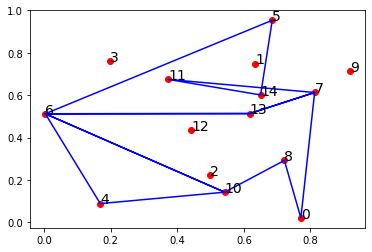

In [ ]:
route = np.array([13, 7, 13, 6, 10, 4, 6, 5, 14, 11, 7, 0, 8, 10, 6])

print("Качество маршрута: ", route_length(list_cities, route))
print("Маршрут: ", route)
route_image(list_cities, route)

assert(round(route_length(list_cities,route),3)) == 56.803

**Генетический алгоритм**
---

Процесс обучения генетического алгоритма можно разделить на 4 этапа:
1. Создание начальной популяции
2. Оценка качества особей
3. Отбор наиболее сильных решений
4. Мутация и/или скрещивание. Формирование нового поколения

Основные этапы генетического алгоритма представлены на рисунке ниже:

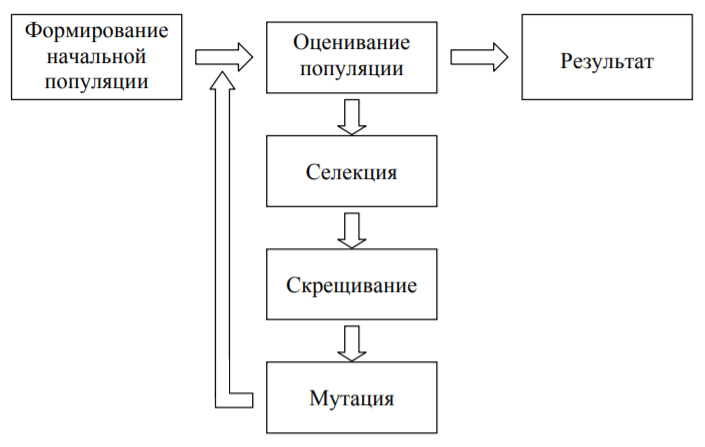

Процесс начинается с набора **особей** (например, случайные маршруты), такой набор называется **популяцией**. Каждая **особь** — это решение задачи, которая была поставлена. Особь характеризуется набором параметров (переменных), которые называют **генами** (например, номера городов). Гены объединены в одну строку и формируют **хромосому** — решение задачи.

**1. Создание начальной популяции**

Создадим начальную популяцию из случайных маршрутов. Случайный маршрут, как правило, является плохим решением данной задачи. Повторное посещение городов в данной поставноке задачи не требуется. Генерация случайных маршрутов без повторного посещения городов позволит улучшить их качество, от того на сколько качественный маршруты будут сгенерированы в начальной популяции зависит скорость схождения алгоритма и конечное качество решения.

Сгенерируем несколько случайных маршрутов без повторного посещения городов и выберем лучший.

In [ ]:
def generate_routes(number_routes):
    # генерация маршрутов без повторений
    routes = []
    for i in range(number_routes):
       routes.append(np.random.permutation(number_cities))  # метод permutation перемешивает сгенерированные города, создавая уникальные последовательности
    routes = np.array(routes)
    
    return routes

In [ ]:
routes = generate_routes(100)
print(len(routes))

100


**2. Оценка качества особей. Функция приспособленности.**

Целью данной операции является оценка качества особей для последующего отбора наиболее приспособленных из них.

На вход данной функции подается список особей. Данная функция оценивает и выводит качество всех особей (качество всех маршрутов).

**Задание**: рассчитайте приспособленность каждой особи в популяции (список routes) и запишите полученный результат в список (length_penalty).

In [ ]:
from re import I
# качество особей (маршрутов)
def quality(list_cities, routes):
    # проведем оценку маршрутов
    length_penalty = []
    #YOUR CODE HERE
    for i in range(len(routes)):
      length_penalty.append(route_length(list_cities, routes[i]))
    length_penalty = np.array(length_penalty)
    print(length_penalty)
    return length_penalty

Оценим начальную популяцию и найдем самый короткий и качественный сгенерированный маршрут. Затем выведем его.

[7.46049287 7.67926617 7.25470071 6.60194711 6.82550491 6.82683495
 5.76388519 7.41411427 7.60534581 7.6367552  7.63037138 8.03235406
 7.77424431 7.43315327 6.64693777 7.35632009 7.26231936 7.00346924
 7.99092407 7.64582793 8.01306668 7.57247425 7.01066915 6.22344407
 8.03873937 8.03188764 6.65489781 7.14550216 8.03667405 7.53366781
 6.59864525 6.99781128 8.12192588 7.06652735 7.07382047 7.2632381
 7.3985875  8.37973076 8.07959582 7.04186124 7.27276021 7.28735111
 6.89443233 6.86527743 7.42729626 7.50741289 7.05992013 7.74232724
 7.42106396 6.57007341 6.55978375 7.52235151 7.51352762 7.28739823
 7.91155232 7.55383852 7.59109819 6.87280131 7.54408138 7.17341499
 6.30319464 6.83870393 7.19593911 6.51440826 8.57887139 7.06902858
 8.27021424 7.35714921 7.66513013 8.10567352 6.69617636 6.77169067
 7.64408526 7.19963512 7.35710545 8.00433238 8.1727261  8.25924446
 7.3182938  6.901767   6.55186283 7.72939682 8.23555236 6.67697382
 7.46050485 8.74814987 6.61734081 7.61085007 7.27125957 7.86421

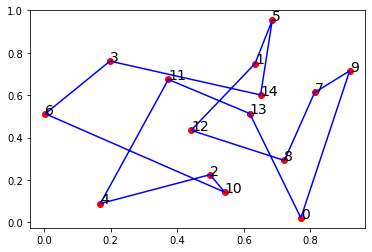

In [ ]:
length_penalty = quality(list_cities, routes)

min_route = routes[np.argmin(length_penalty)]
print("Маршрут: ", min_route)
print("Качество маршрута:", route_length(list_cities, min_route))
print("Размер:",len(length_penalty))
route_image(list_cities, min_route)

Случайный маршрут, построенный без повторного посещения городов, в среднем значительно лучше полностью случайного маршрута.

При постановке задачи с малым количествов городов (например 8) и достаточном количестве сгенерированных маршрутов (например 500), решение задачи может быть найдено уже на данном этапе. При решении задачи с большим количеством городов, требуется использование других подходов. Так можно использовать полный перебор вариантов с проверкой всех возможных решений, но данный подход является ресурсозатратным и может не позволить найти решение задачи за приемлемое время. Использование генетического алгоритма может ускорить поиск решения данной задачи, но не гарантирует нахождения решения.

**3. Отбор наиболее сильных решений. Селекция**

Идея селекции особей заключается в том, чтобы отобрать наиболее сильные решения и передать их гены в следующее поколение, на основе отсева наиболее слабых особей из популяции.

В данном случае мы не будем выделять селекцию как отдельный этап, в данной реализации генетического алгоритма на каждой итерации мы будем заменять одну наименее приспособленную особь на новую. Новая особь получается в результате операции скрещивания или мутации случайных особей популяции.

**4.1. Мутация**

Операция мутация особи заключается в случайном изменении ее генов, например: перестановка городов местами, генерация новой случайной части маршрута и т.д. Мутация особи может как улучшить существующий маршрут, так и ухудшить его. Но делая случайные изменения и сохраняя положительные мутации мы можем постепенно найти более качественное решение задачи.

На изображении ниже можно увидеть пример положительной мутации.

Пример положительной мутации особи (маршрута):
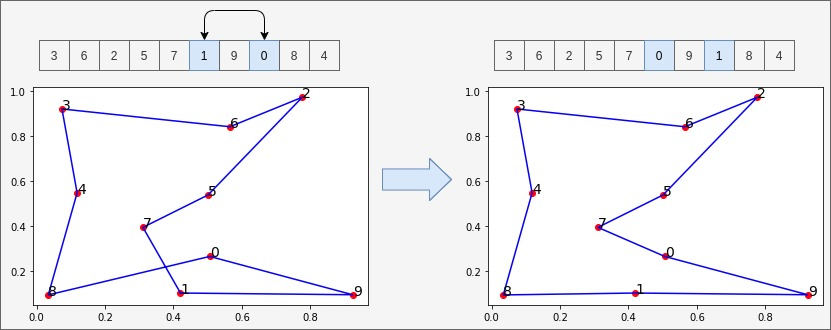

**Задание**: реализуйте операцию мутации (можете попробовать предложить свой вариант). 

**Обратите внмание, что особь route, передаваемая в качестве параметра функции изменяться не должна !!!!**

In [ ]:
from os import wait
from copy import deepcopy as dcopy
import random
import time
# мутация маршрута
def mutation(route):
    
    # YOUR CODE HERE
    new_route = dcopy(route)
    k = random.randint(0,len(route)-1)
    j = random.randint(k,len(route)-1)
    new_route[j] = route[k]
    new_route[k] = route[j]
    # print(k)
    # print(j)
    # new_route = np.array(random.sample(list(route), len(route)))
    return new_route

In [ ]:
# проверка выполнения мутации
print(route)
route1 = mutation(route)
print(route1)

[13  7 13  6 10  4  6  5 14 11  7  0  8 10  6]
[13  7 13  6 10  5  6  4 14 11  7  0  8 10  6]


**4.2. Скрещивание**

Операция скрещивания заключается в создании новой особи на основе двух особей родителей, например: объединение двух случайных участков геномов, перенос некоторой последовательности генов из одной особи в другую и т.д. Целью данной операции является объединение положительных качеств особей родителей, которое позволит получить новую особь с более качественным геномом.

Пример успешного скрещивания двух особей (скрещивание маршрутов):

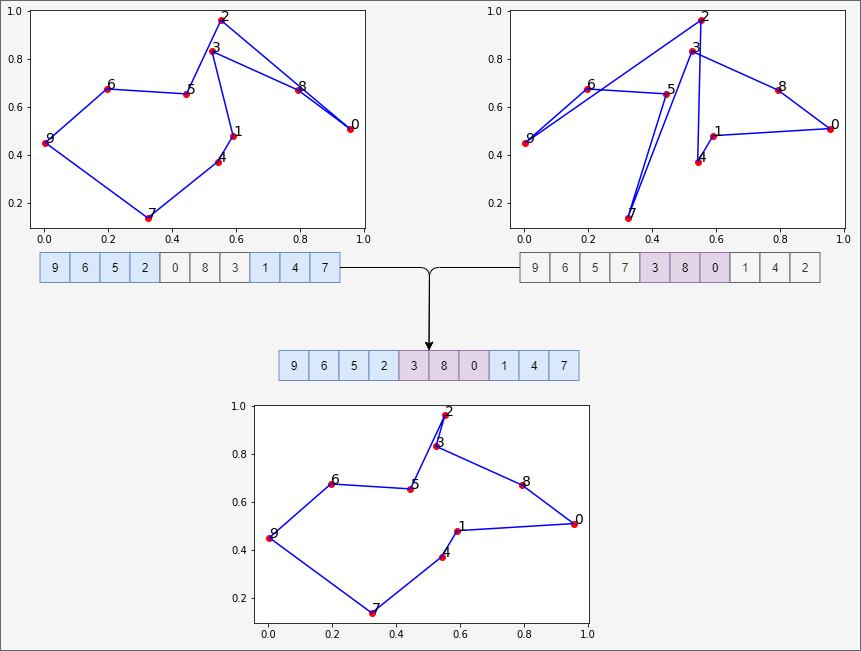

**Задание**: реализуйте операцию скрещивания (можете попробовать предложить свой вариант).

**Подсказка:** задайте случайным образом 2 индекса: i,j. Сформируйте новую особь, состоящую из элементов[0:i] из особи route_1,  элементов[i:j] из особи route_2, и из элементов[j:] из особи route_1.

In [ ]:
from copy import deepcopy as dcopy
# скрещивание
def crossbreeding(route_1, route_2):
    
    # YOUR CODE HERE
    k = random.randint(1,len(route_1)-2)
    m = random.randint(k,len(route_1)-1)
    # YOUR CODE HERE
    route_3 = np.array(list(route_1[:k]) + list(route_2[k:m]) + list(route_1[m:]))
    
    return route_3

In [ ]:
route1 = [1,2,3,4,5,6,7]
route2 = [7,6,5,4,3,2,1]
route3 = crossbreeding(route1,route2)
print(route1,route2)
print(route3)


[1, 2, 3, 4, 5, 6, 7] [7, 6, 5, 4, 3, 2, 1]
[1 2 3 4 5 6 7]


Операции мутации и скрещивания могут быть адаптированы под условия данной задачи. Вы можете предложить свои варианты. Например, данные операции можно реализовать таким образом, что в результате будет получен маршрут без повторения городов, что увеличит вероятность успешности данных операций.

Реализуем генетический алгоритм.

**Задание**: примените основные операции генетического алгоритма.

**Общий алгоритм:**
1. Задание количества эпох (итераций).
2. Задание количества особей в поколении.
3. Инициализация всех особей случайными значениями.
4. Оценка качества созданных особей.
5. Цикл по количетсву эпох:
    5.1. Поиск особи с наихудшим качеством (большее значение функции quality) для дальнейшей замены.
    5.2. Выбор двух случайных особей для генерации новой с помощью мутации или скрещиваия.
    5.3. Задание вероятности мутации или скрещивания, вызов соответствующих функций.
    5.4. Замена наихудшей особи новой, полученной в результате мутации или скрещивания.

[7.46076569 6.76327994 7.49136578 7.01495054 8.32864921 6.50600205
 6.25336933 7.54789978 7.41257068 7.84294814 8.02180117 6.92028315
 6.81402867 7.4096992  8.1229739  7.13306003 7.45536567 7.13036505
 7.35232737 6.81852846]
Итерация: 0
Маршрут:  [10  7  1  8  0  2  9 12  3  6 11 14  5 13  4]
Качество маршрута: [7.46076569 6.76327994 7.49136578 7.01495054 8.32864921 6.50600205
 6.25336933 7.54789978 7.41257068 7.84294814 8.02180117 6.92028315
 6.81402867 7.4096992  8.1229739  7.13306003 7.45536567 7.13036505
 7.35232737 6.81852846]
Качество маршрута: 6.253369328150885


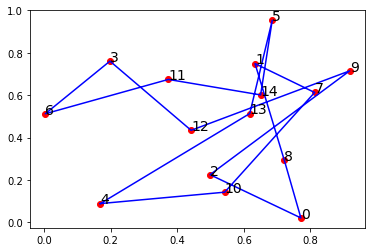




Итерация: 5000
Маршрут:  [ 0 10 13 11 12  2  4  6  3  1  5  9  7 14  8]
Качество маршрута: [4.40537396 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396
 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396
 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396
 4.40537396 4.40537396]
Качество маршрута: 4.4053739612401825


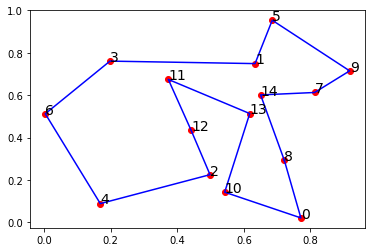




Итерация: 10000
Маршрут:  [ 0 10 13 11 12  2  4  6  3  1  5  9  7 14  8]
Качество маршрута: [8.1433806  4.40537396 4.40537396 4.40537396 4.40537396 4.40537396
 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396
 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396 4.40537396
 4.40537396 4.40537396]
Качество маршрута: 4.4053739612401825


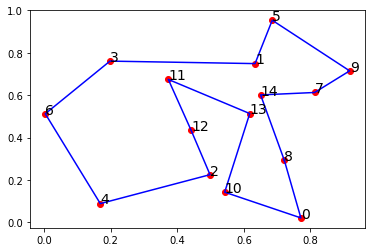




Итерация: 15000
Маршрут:  [ 0 14  2 13 11 12  4  6  3  1  5  9  7 10  8]
Качество маршрута: [5.24136236 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194]
Качество маршрута: 5.241362357745271


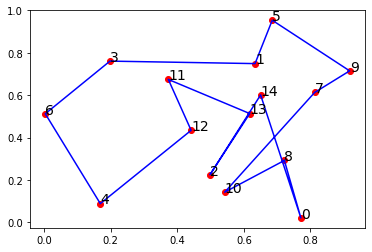




Итерация: 20000
Маршрут:  [ 0 10  2 13 11 12  4  6  3  1  5  9  7 14  8]
Качество маршрута: [4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194]
Качество маршрута: 4.299521940598913


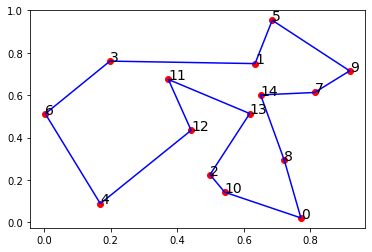

In [ ]:
from copy import deepcopy as dcopy

# 1. Задание количества эпох (итераций).
number_iterations = 25000 # количество итераций улучшения

# 2. Задание количества особей в поколении.
number_routes = 20 

# 3. Инициализация всех особей случайными значениями.
routes = generate_routes(number_routes)

# 4. Оценка качества особей. Функция приспособленности.
length_penalty = quality(list_cities, routes) # оценить качество всех особей популяции

# 5. Цикл по количетсву эпох:
for i in range(number_iterations):
    
    #  5.1. Поиск особи с наихудшим качеством (большее значение функции quality) для дальнейшей замены.
    worse_qual_ind = length_penalty.argmax() # худшая особь имеет максимальное значение функции quality
    best_qual_ind = length_penalty.argmin() # лучшая особь имеет минимальное значение функции quality
    
    # 5.2. Выбор двух случайных особей для генерации новой с помощью мутации или скрещиваия.
    route_index_1 = np.random.randint(number_routes)
    route_index_2 = np.random.randint(number_routes)

    # 5.3. Задание вероятности мутации или скрещивания (0.5), вызов соответствующих функций.
    # (упрощенный вариант селекции с заменой одной наименее приспособленной особи на новую)
    if np.random.random() < 0.5:
      # 4.1 мутация
      routes[worse_qual_ind] = mutation(routes[worse_qual_ind])
    else:
      # 4.2 скрещивание
      routes[worse_qual_ind] = crossbreeding(routes[route_index_1], routes[route_index_2])

    # 2. Оценка качества особей. Функция приспособленности.
    length_penalty[worse_qual_ind] = route_length(list_cities, routes[worse_qual_ind])

    # вывод промежуточного результата
    if i%(number_iterations//5) == 0:
      print("Итерация:", i)
      print("Маршрут: ", routes[best_qual_ind])
      print("Качество маршрута:", length_penalty)
      print("Качество маршрута:", route_length(list_cities, routes[best_qual_ind]))
      route_image(list_cities, routes[best_qual_ind])
      print('\n\n')

Выведем изображение итогового маршрута.

[6.27087259 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194]
[ 0 10  2 13 11 12  4  7  3  1  5  9  6 14  8]
[6.27087259 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194 4.29952194
 4.29952194 4.29952194]
Маршрут:  [ 0 10  2 13 11 12  4  6  3  1  5  9  7 14  8]
Качество маршрута: 4.299521940598913


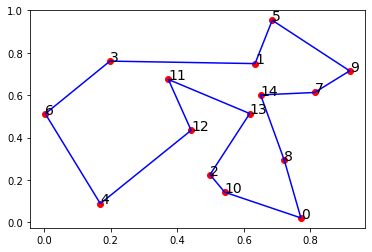

In [ ]:
length_penalty = quality(list_cities, routes)
print( routes[0])
print(length_penalty)
min_route = routes[np.argmin(length_penalty)]
print("Маршрут: ", min_route)
print("Качество маршрута:", route_length(list_cities, min_route))
route_image(list_cities, min_route)

Генетический алгоритм позволяет решать множество различных оптимизационных и других задач. В результате данной работы мы рассмотрели реализацию данного алгоритма для задачи о коммивояжере.

Чтобы увеличить скорость и качество работы, генетический алгоритм может быть адаптирован под условия конкретной задачи, так можно изменять реализацию: генерации первого поколения, мутации, скрещивания, селекции, функции приспособленности, выбор особей для мутации и скрещивания, сохранение наиболее приспособленных особей без изменений (элитные особи) и многое другое.

Вопросы к лабораторной работе
---

Для закрепления изученного материала ответьте на приведенные ниже вопросы (вы можете воспользоваться [**основными**](https://portal.tpu.ru/SHARED/e/EXCEIBOT/academic/ISTab/Lab2.pdf) и **дополнительными материалами** (см. выше):

1. Охарактеризуйте понятие **особи** и **популяции** в генетическом алгоритме?

Особь - это составляющая популяции и каждая особь является решением поставленной задачи(другой вопрос в том, качественным или нет). Популяция - это набор особей. В данной работе рассматривались одинаковые популяции.

2. Опишите основные этапы генетического алгоритма.

Формирование популяции

Оценивание популяции

Селекция особей

Скрещивание особей

Мутация особей

Получение решения

3. Какие типы задач можно решать с помощью генетического алгоритма? Приведите примеры таких задач.

Задачи линейной алгебры(нахождение решение уравнения, поиск максимума или минимума и другие), задачи оптимизации.